<a href="https://colab.research.google.com/github/gaasganegoda/Customer_purchase_status-_prediction/blob/main/Customer_purchase_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's try to do implement machine learning model to predict purchase status such as yes or no
# I used kaggle data set "https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset"

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/customer/customer_purchase_data.csv")

In [3]:
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [4]:
df.sample(5)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
786,34,1,68252.415047,20,2,46.729826,1,1,1
93,27,1,103956.910217,2,0,32.592432,0,1,0
1350,41,0,129313.305325,12,3,40.697070,0,1,0
514,44,1,135999.324758,0,3,36.567936,0,3,0
1273,50,1,145159.885533,14,1,21.393759,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [6]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [7]:
df.isna().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [8]:
# prompt: There are 5 ProductCategories in ProductCategory cloumn. I need to onehot encode.  in each column True be "1" and False be "0"

ProductCategory_dummies = pd.get_dummies(df['ProductCategory'], prefix='ProductCategory')
df = pd.concat([df, ProductCategory_dummies], axis=1)
df = df.drop('ProductCategory', axis=1)
df = df.replace({True: 1, False: 0})
df


,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4
0,40,1,66120.267939,8,30.568601,0,5,1,1,0,0,0,0
1,20,1,23579.773583,4,38.240097,0,5,0,0,0,1,0,0
2,27,1,127821.306432,11,31.633212,1,0,1,0,0,1,0,0
3,24,1,137798.623120,19,46.167059,0,4,1,0,0,0,1,0
4,31,1,99300.964220,19,19.823592,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,34.590743,0,5,1,1,0,0,0,0
1496,67,1,28775.331069,18,17.625707,0,1,1,0,0,1,0,0
1497,40,1,57363.247541,7,12.206033,0,0,0,0,0,0,0,1
1498,63,0,134021.775532,16,37.311634,1,0,1,0,0,1,0,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

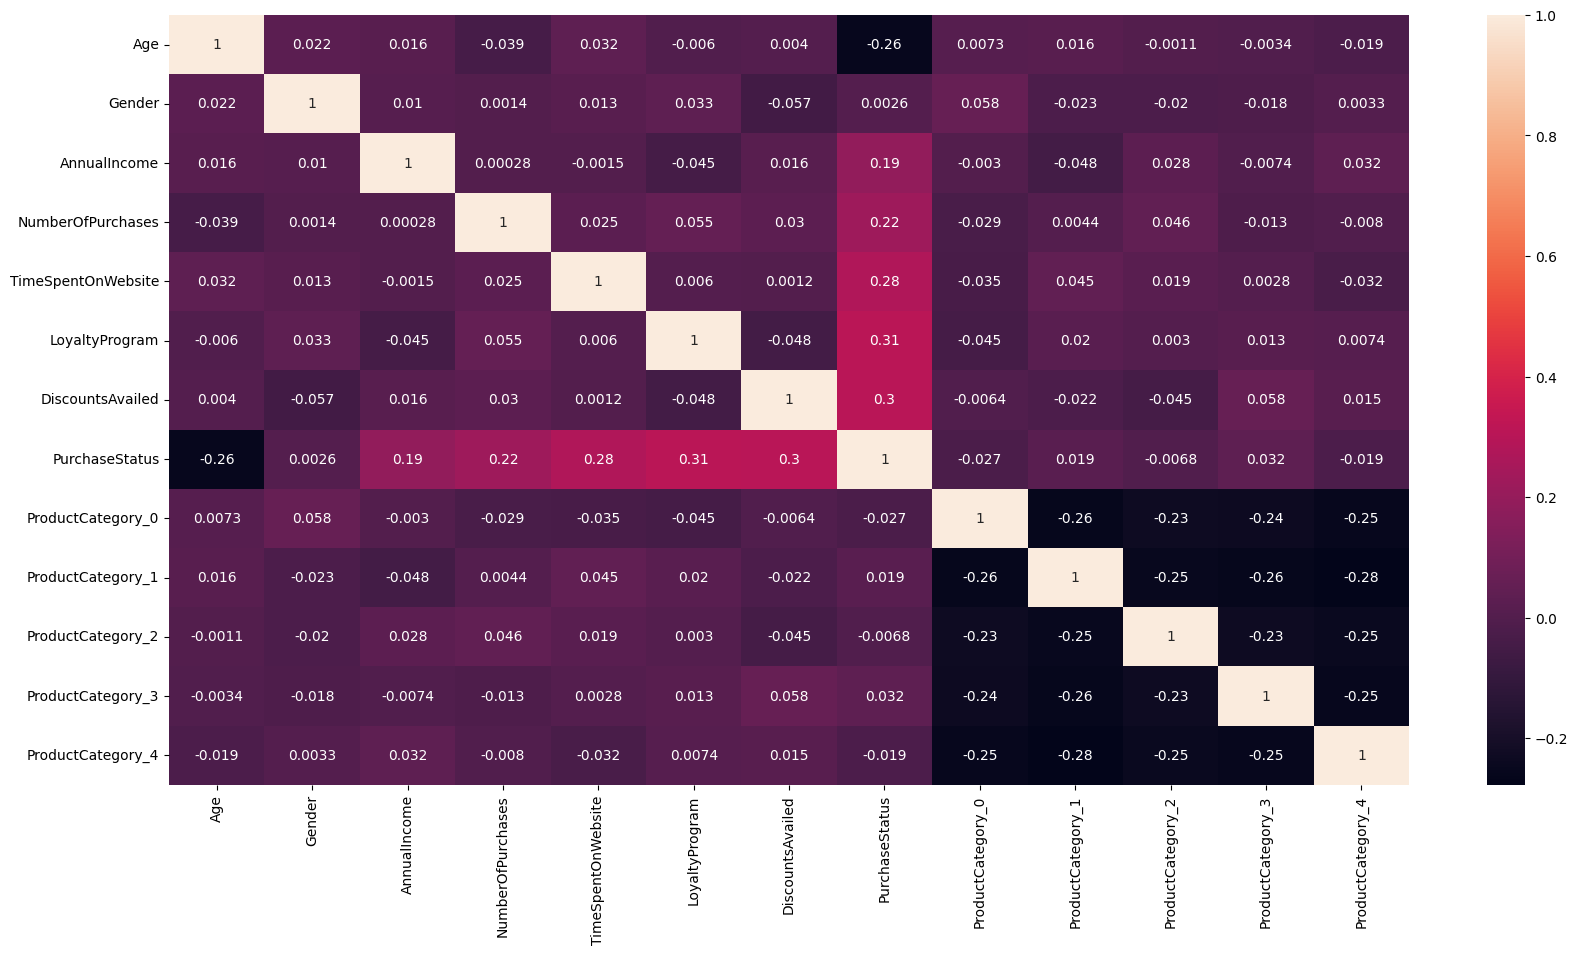

In [10]:
# prompt: visualize the data using heatmap

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

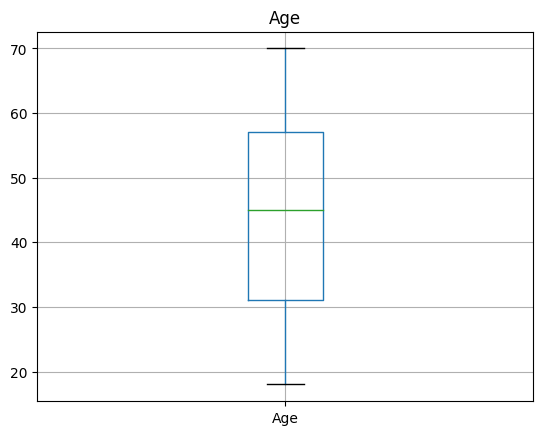

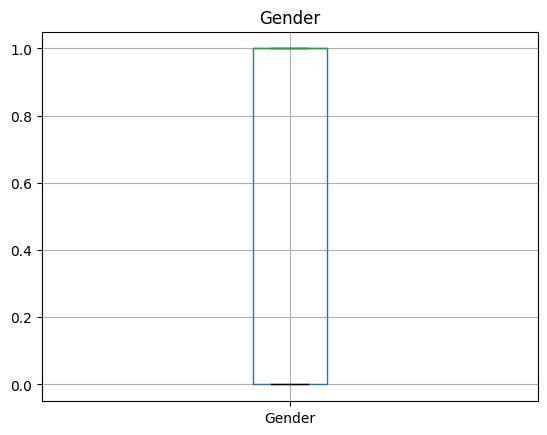

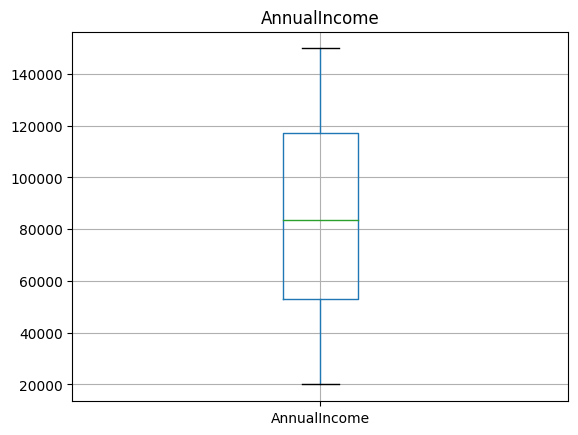

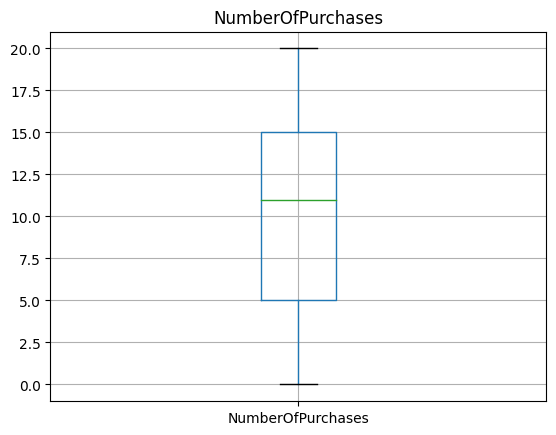

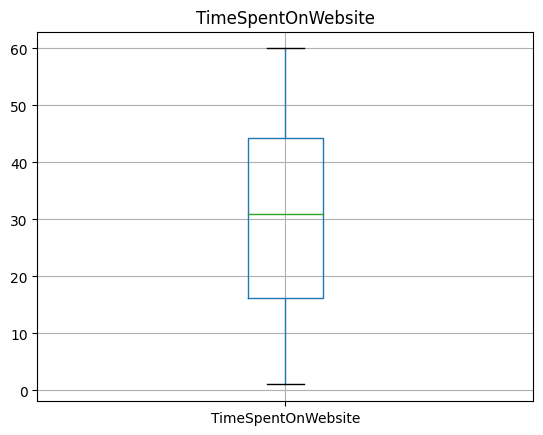

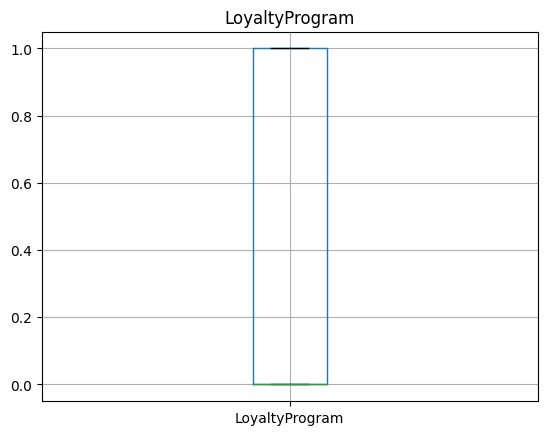

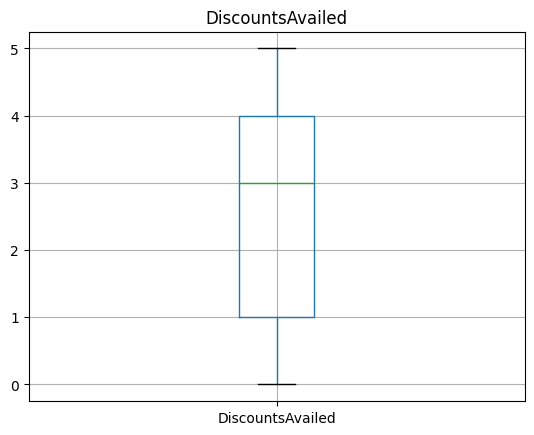

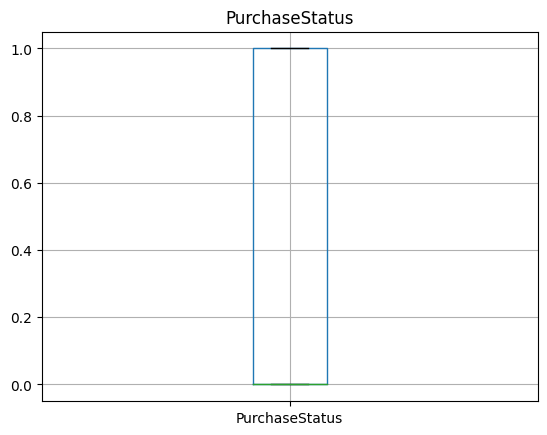

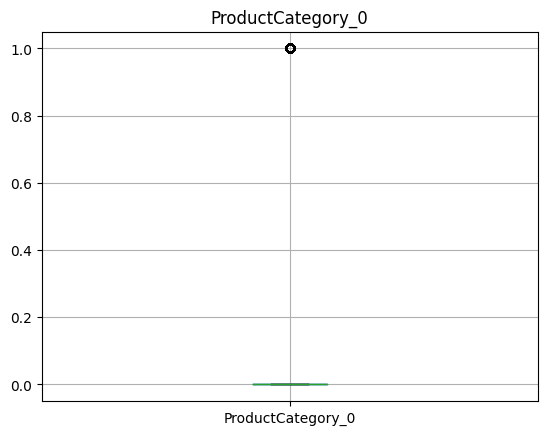

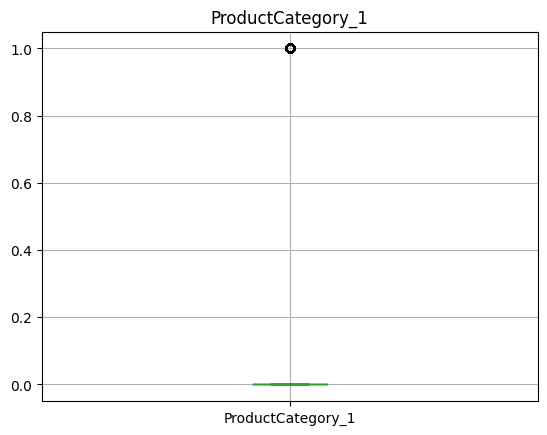

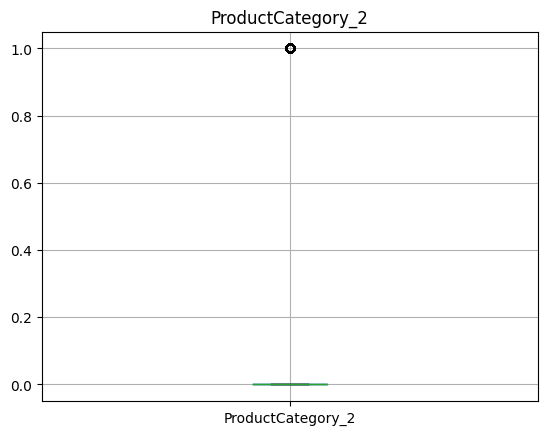

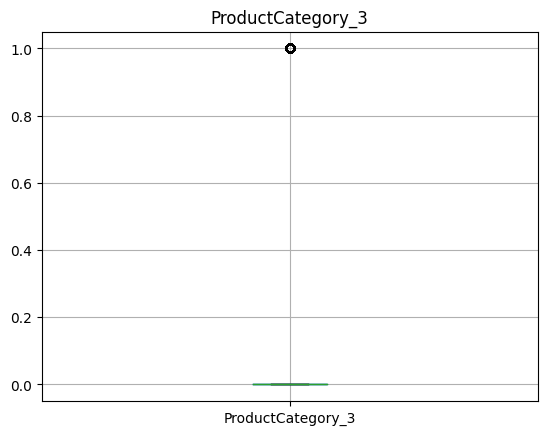

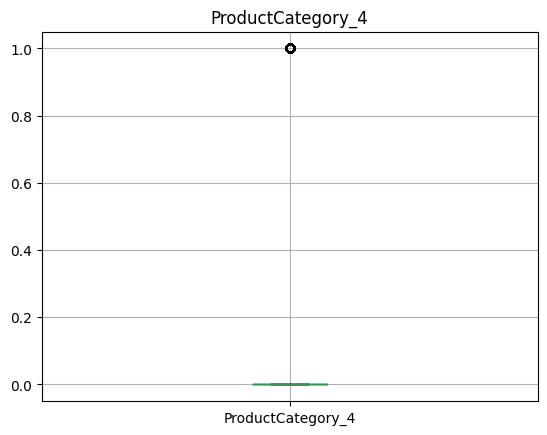

In [11]:
# prompt: creatr box plots for each column

# Create box plots for each column
for column in df.columns:
  plt.figure()
  df.boxplot([column])
  plt.title(column)
  plt.show()


In [12]:
# define x and y
x = df.drop(columns=['Gender','PurchaseStatus'])
y = df['PurchaseStatus']

In [13]:
x.shape
x

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,ProductCategory_0,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4
0,40,66120.267939,8,30.568601,0,5,1,0,0,0,0
1,20,23579.773583,4,38.240097,0,5,0,0,1,0,0
2,27,127821.306432,11,31.633212,1,0,0,0,1,0,0
3,24,137798.623120,19,46.167059,0,4,0,0,0,1,0
4,31,99300.964220,19,19.823592,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,39,65048.141834,13,34.590743,0,5,1,0,0,0,0
1496,67,28775.331069,18,17.625707,0,1,0,0,1,0,0
1497,40,57363.247541,7,12.206033,0,0,0,0,0,0,1
1498,63,134021.775532,16,37.311634,1,0,0,0,1,0,0


In [14]:
y.shape
y

0       1
1       0
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    0
1498    1
1499    1
Name: PurchaseStatus, Length: 1500, dtype: int64

In [15]:
#divided data set into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
# build a logistic regression model with hyper parameter tuning

from sklearn.linear_model import LogisticRegression
# logistic regression model
model = LogisticRegression(C=0.1,penalty="l2",max_iter = 100)
model.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [18]:
# predict values using x_test data

y_pred = model.predict(x_test)

In [19]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [20]:
# show the model accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8466666666666667

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[149,  21],
       [ 25, 105]])

In [24]:
import joblib

# save the model
joblib.dump(model, '/content/customer/model.pkl')



In [25]:
# load the model
model = joblib.load('/content/customer/model.pkl')
#predict data
prdict= model.predict(x_test)

In [26]:
prdict

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])